# Ford  GoBike Membership Insights
###  Zainab Mohammed


## Investigation Overview


In this presentation, I will be looking at factors that characterize members of bike_share and relationships between them. 
I will be focusing on types of users and members who use bike-share for all trips.


## Dataset Overview

After preliminary data wrangling,the dataset contained 174952 observations and 14 Features but after further exploration,the dataset contains 174749 observations and 14 features  because I dropped some observations due to inconsistent ages. Four variables(duration_mins, member_age,start_hour and end_hour) are numeric. Date variables are start_date and end_date whiles the rest of the variables are strings


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
bike_df = pd.read_csv('cleaned_bike_df.csv')



> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distribution of age of members
This is the distribution of ages of members after dropping outliers.
The ages are now from 18 years to 78 years.
The most occurring ages is between 25 and 35


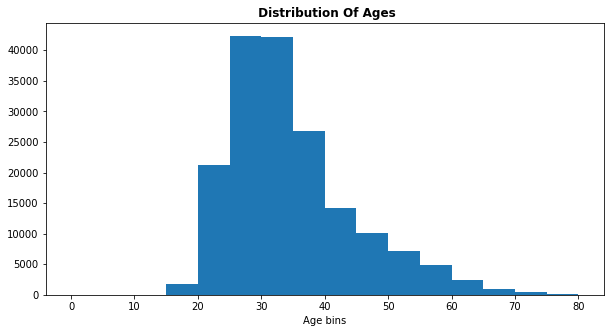

In [3]:
#distribution of age
plt.figure(figsize = (10,5))
bins = np.arange(0,bike_df['member_age'].max() + 5,5)
plt.hist(data = bike_df,x = 'member_age', bins = bins)
plt.xlabel('Age bins')
plt.title(' Distribution Of Ages', weight = 'bold');

## Distribution of trip duration
This histogram show that most trips last between 5 and 10 minutes


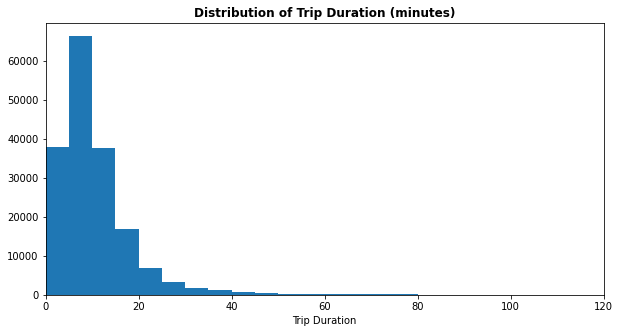

In [4]:
plt.figure(figsize = (10,5))
bins = np.arange(0,bike_df['duration_mins'].max()+5, 5)
plt.xlim(0,120)
plt.hist(data = bike_df, x = 'duration_mins', bins = bins)
plt.xlabel('Trip Duration')
plt.title('Distribution of Trip Duration (minutes)',weight = 'bold');

## Proportion of members who are customers or subscribers

This shows the proportion of members who are subscribers and regular customers .            
Subscribers make up approximately 91% of members.

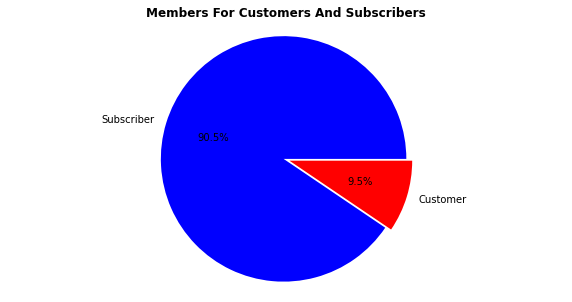

In [5]:
valuecount = bike_df['user_type'].value_counts()
label='Subscriber','Customer'
plt.figure(figsize = (10,5))
my_explode =(0.05,0)
my_colours = ['blue','red']
plt.pie(valuecount,labels = label,autopct='%1.1f%%', colors = my_colours,explode = my_explode)
plt.title('Members For Customers And Subscribers',weight = 'bold')
plt.axis('equal');

## Bike-share for all their trips
This shows the proportion of members who use bike-share for all their trips                          
90.1% of members Do Not use bike_share for all trips.


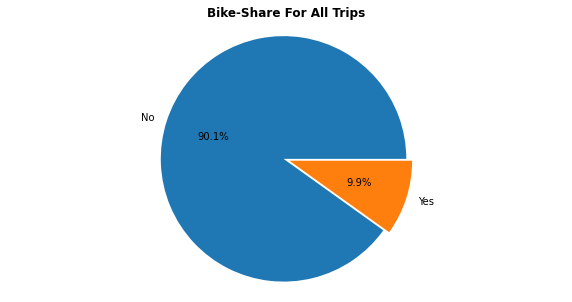

In [6]:
counts = bike_df['bike_share_for_all_trip'].value_counts()
plt.figure(figsize = (10,5))
labels = 'No','Yes'
my_explode =(0,0.05)
plt.pie(counts, labels = labels,autopct='%1.1f%%',explode = my_explode)
plt.title('Bike-Share For All Trips',weight = 'bold')
plt.axis('equal');

## Distribution of trip based on time of the day
This shows time of the day where members usually use bike-share.                                     
In this histogram,the distribution of the hour of day is bimodal. Trips usually starts between 8-9am And between 5-6pm.

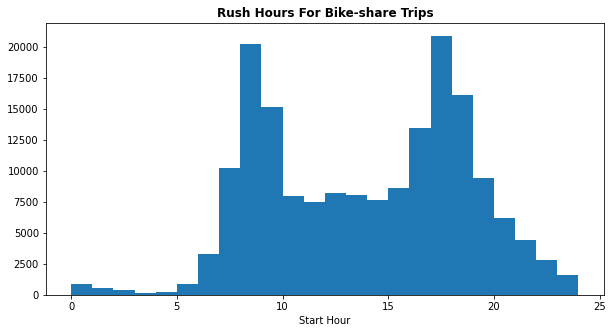

In [7]:
plt.figure(figsize = (10,5))
bins = np.arange(0,25, 1)
plt.hist(data = bike_df, x = 'start_hour', bins = bins)
plt.xlabel('Start Hour')
plt.title('Rush Hours For Bike-share Trips',weight = 'bold');

## Number of Members per Gender
Members of this bike share are mostly males.Their numbers are more than twice the Females and even more than 'Other' gender


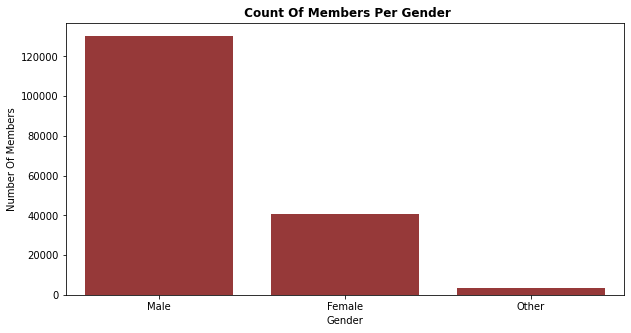

In [8]:
gender_count = bike_df['member_gender'].value_counts().index
plt.figure(figsize = (10,5))
sns.countplot(data = bike_df, x = 'member_gender', color = 'brown', order = gender_count)
plt.title(' Count Of Members Per Gender',weight = 'bold')
plt.xlabel('Gender')
plt.ylabel('Number Of Members');



### Number of trips during hours of the day based on user type
The time of the day that recorded most number of trips is 8am and 5pm by non-subscribers(customers).


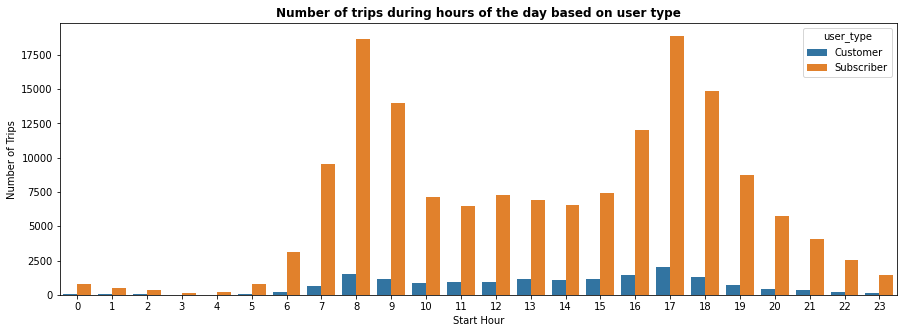

In [9]:
plt.figure(figsize = (15,5))
sns.countplot(data = bike_df, x = "start_hour", hue='user_type')
plt.title("Number of trips during hours of the day based on user type",weight = 'bold')
plt.xlabel('Start Hour')
plt.ylabel('Number of Trips')
plt.show()

## Trip duration rate during hours of the day for user type
This shows when the average trip duration for user types throughout the day. Both user types go on longer trips during the hours of 3am although customers(non-subscribers) have a significantly higher rate

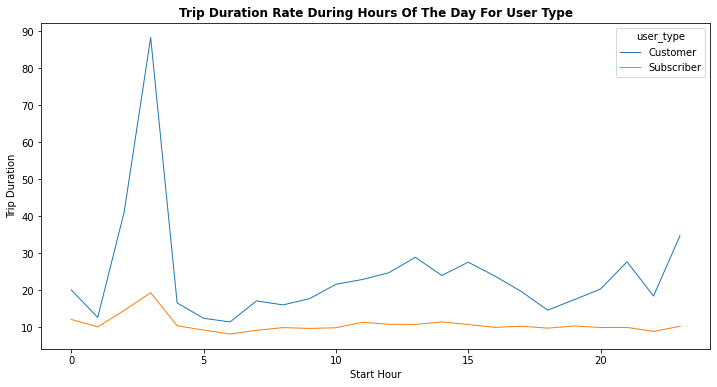

In [10]:
hour = bike_df.pivot_table(index = 'start_hour', columns = 'user_type', values = 'duration_mins', aggfunc = 'mean')
hour.plot(kind='line', linewidth=1.0, figsize=(12, 6))
plt.ylabel('Trip Duration')
plt.xlabel ('Start Hour')
plt.title("Trip Duration Rate During Hours Of The Day For User Type",weight = 'bold');

## User type and members who use bike-share for all trips
A big chunk of members who Do Not use bike-share for all their trips are subscribers. Both groups of members do not really use bike-share for all their trips.

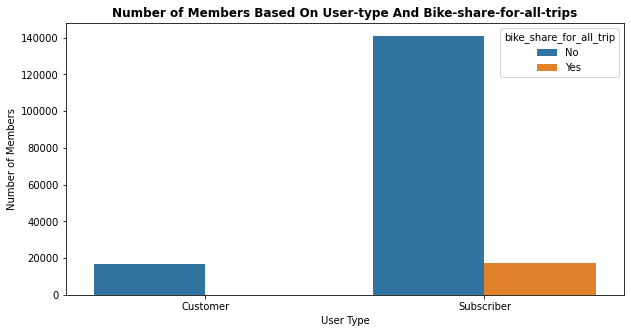

In [11]:
plt.figure(figsize = (10,5))
sns.countplot(hue = 'bike_share_for_all_trip', x = 'user_type', data = bike_df)
plt.title('Number of Members Based On User-type And Bike-share-for-all-trips',weight = 'bold')
plt.xlabel('User Type')
plt.ylabel('Number of Members');

## Average trip duration for user type
The average duration covered based on user type
Customers have higher average trip duration of about 23 than subscribers who are about 
average of 10

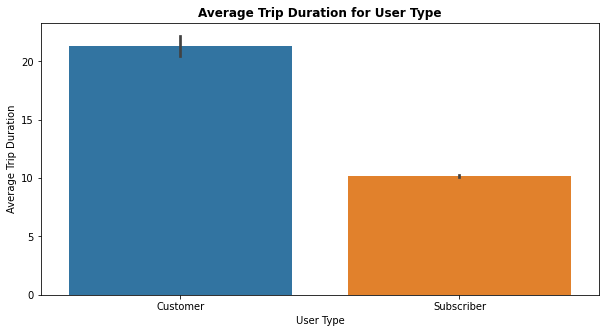

In [12]:
plt.figure(figsize = (10,5))
sns.barplot(x = 'user_type', y = 'duration_mins', data = bike_df )
plt.title('Average Trip Duration for User Type',weight = 'bold')
plt.xlabel('User Type')
plt.ylabel('Average Trip Duration');

## Trip Duration and User-type
This shows how long trip last based on user-type
Non subscribers go on longer trips than subscribers throughout the month. February,9th recorded the highest  trip duration and the least trip duration was on February,13
Non Subscribers had the most trip duration on February,17th and 23rd.

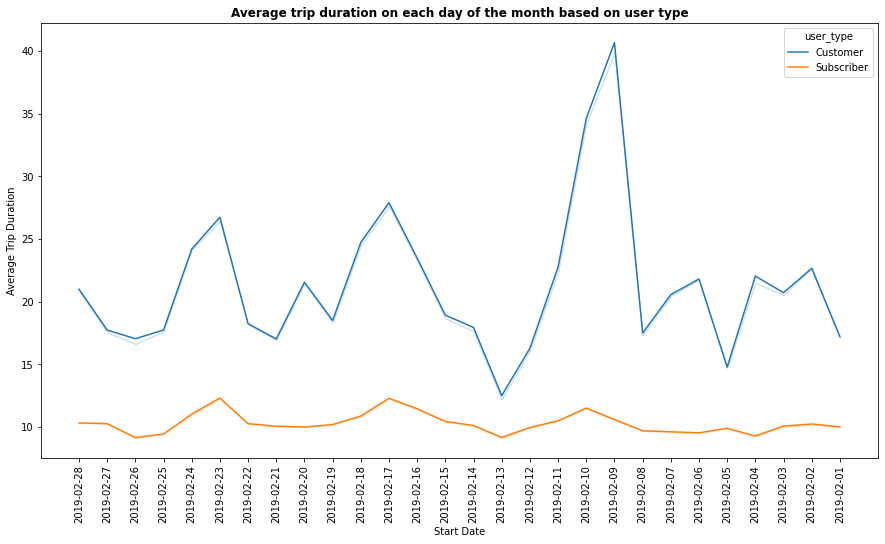

In [13]:
plt.figure(figsize= (15,8))
plt.xticks(rotation = 90)
sns.lineplot(data = bike_df, x = 'start_date', y = 'duration_mins',estimator= 'mean',hue = 'user_type', ci = False)
plt.title('Average trip duration on each day of the month based on user type',weight = 'bold')
plt.xlabel('Start Date')
plt.ylabel('Average Trip Duration');

## Trip time covered on each day of the month based on bike_share_for_all_trips
Members who Do Not use bike-share for all trips did longer trips than members who use bike_share for all trips throughout the month. February 17th, recorded highest trip duration for members who Do Not use bike-share for all trips while February 23rd was the highest for members who use bike-share for all trips February 13th recorded the least trip duration for both groups

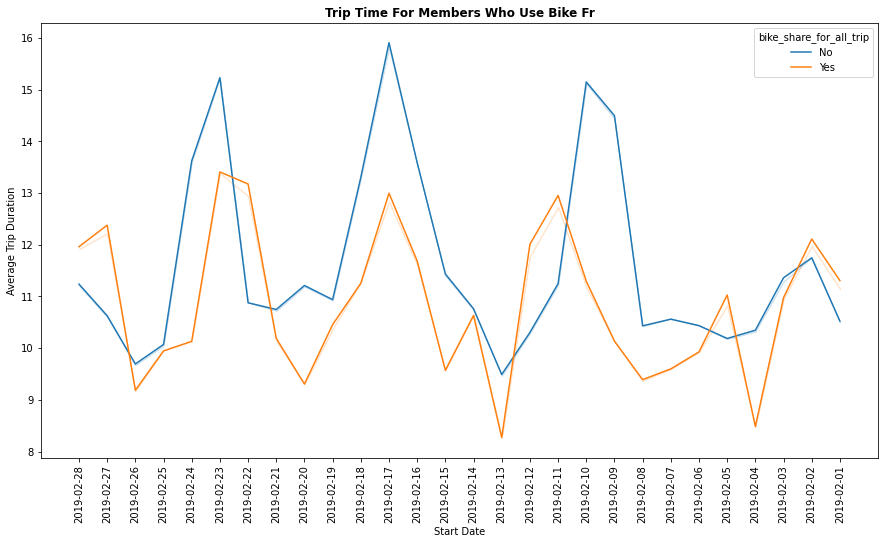

In [14]:
plt.figure(figsize= (15,8))
plt.xticks(rotation = 90)
sns.lineplot(data = bike_df, x = 'start_date', y = 'duration_mins',hue = 'bike_share_for_all_trip', estimator ='mean',ci = False)
plt.title('Trip Time For Members Who Use Bike Fr',weight = 'bold')
plt.xlabel('Start Date')
plt.ylabel('Average Trip Duration');

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [ ]:
!jupyter nbconvert Part_II_presentation_deck.ipynb --to slides --post serve --no-input --no-prompt
